In [5]:
from math import exp
import numpy as np
from numpy.linalg import norm, inv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential
import numdifftools as nd
import time
import math

In [ ]:
x = 1
y = 1

In [ ]:
def sigmoid(weights):
    a = []
    for w in weights:
        a.append(1/(1+exp(-x*w)))
    return a
def hinge(weights):
    a = []
    for w in weights:
        a.append(max(1-y*x*w,0))
    return a
def l1_norm(weights):
    a = []
    for w in weights:
        a.append(norm(w))
    return a

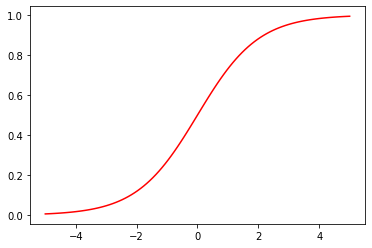

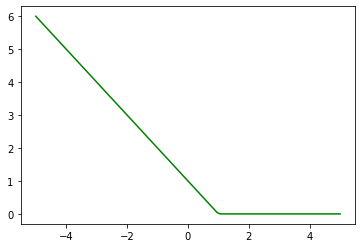

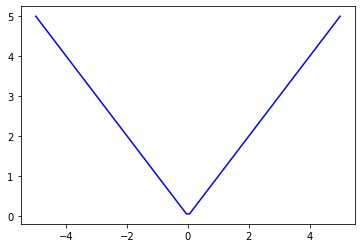

In [ ]:
domain = np.linspace(-5,5,100)

plt.plot(domain,sigmoid(domain), 'r')
plt.show()
plt.plot(domain,hinge(domain), 'g')
plt.show()
plt.plot(domain,l1_norm(domain), 'b')
plt.show()


In [ ]:
def gradient_descent(w,eta,F):
    weights = []
    for i in range(1000):
        w = w-eta*nd.Gradient(F)([w])
        weights.append(abs(w))
    return weights

In [ ]:
iterations = [i for i in range(1000)]

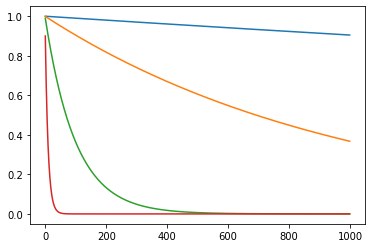

In [ ]:
for eta in [0.0001, 0.001, 0.01, 0.1]:
    weights = gradient_descent(1,eta,lambda x:1/2*x**2)
    plt.plot(iterations,weights)

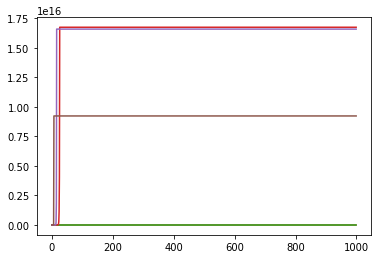

In [ ]:
for eta in [0.5, 1, 2, 5, 10, 100]:
    weights = gradient_descent(1,eta,lambda x:1/2*x**2)
    plt.plot(iterations,weights)

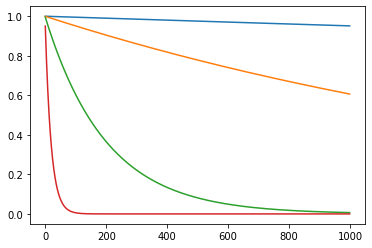

In [ ]:
for eta in [0.0001, 0.001, 0.01, 0.1]:
    weights = gradient_descent(1,eta,lambda x:1/4*x**2)
    plt.plot(iterations,weights)

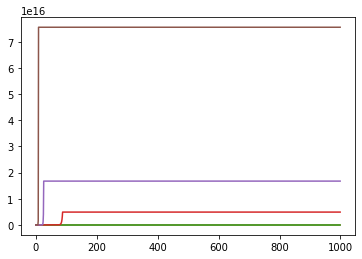

In [ ]:
for eta in [0.5, 1, 2, 5, 10, 100]:
    weights = gradient_descent(1,eta,lambda x:1/4*x**2)
    plt.plot(iterations,weights)

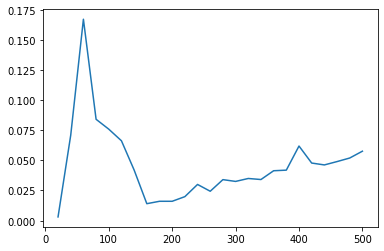

In [ ]:
n = 1000
times = []
dimensions = range(20,501,20)
optimal_weights = []
for d in dimensions:
    start = time.time()
    X = np.random.randn(n,d)
    y = np.random.randn(n)
    w_star = np.matmul(np.matmul(inv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)
    stop = time.time()
    optimal_weights.append(w_star)
    times.append(stop-start)
plt.plot(dimensions,times)
plt.show()

In [4]:
n=100
d=40
X = np.random.randn(n,d)
y = np.random.randn(n)
w_star = np.matmul(np.matmul(inv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)
eigenvalues, eigenvectors = np.linalg.eig(np.matmul(np.transpose(X),X))
minE = min(eigenvalues)
maxE = max(eigenvalues)
eta_0 = 1/maxE
print("eta_0 is bounded by 1/max eigenvalue:", eta_0)

eta is bounded by 1/max eigenvalue: 0.004230250919210032


In [8]:
def gradient_descent(w,eta,F):
    for i in range(1000):
        w = w-eta*nd.Gradient(F)([w])
    return w
def magnitude(w_t,w_star):
    return math.sqrt(sum(pow(e_t-e_star,2) for e_t in w_t for e_star in w_star))

In [11]:
w_0=[0] * d
for eta in [0.01*eta_0, 0.1*eta_0, eta_0, 2*eta_0, 20*eta_0, 100*eta_0]:
    w_t = []
    iters = [t for t in range(100)]
    for t in iters:
        w_t.append(gradient_descent(w_0,eta,lambda w:pow(magnitude(y,np.matmul(X,w)),2)))
    plt.plot(magnitude(w_t,w_star),times)
    plt.show()